In [4]:
# PNC top 200 components

import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC'

rest = []
restmale = []
restfemale = []

pncdemo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))

for sub in pncdemo['age_at_cnb']:
    try:
        a = pncdemo['age_at_cnb'][sub]
        s = pncdemo['Sex'][sub] == 'M'
        r = pncdemo['Race'][sub] == 'AA'
    except:
        continue
    if a < 17:
        continue
    try:
        p =  np.load(f'{pncdir}/fc/{sub}_task-rest_fc.npy')
        rest.append(p)
        if r:
            restmale.append(p)
        else:
            restfemale.append(p)
    except:
        pass

rest = np.stack(rest)
restmale = np.stack(restmale)
restfemale = np.stack(restfemale)

print(len(rest), len(restmale), len(restfemale))

467 186 281


In [5]:
# BSNIP

import pickle
import numpy as np

bsnipdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/BSNIP'

fc = []
fcmale = []
fcfemale = []

bsnipdemo = pickle.load(open(f'{bsnipdir}/demographics.pkl', 'rb'))

for sub in bsnipdemo['DXGROUP_1']:
    try:
        d = bsnipdemo['DXGROUP_1'][sub]
        r = bsnipdemo['Race'][sub]
        s = bsnipdemo['sex'][sub] == 's1.0' # male
        if d != 'NC' or r not in ['CA', 'AA']:
            continue
        r = r == 'AA'
    except:
        continue
    try:
        p = np.load(f'{bsnipdir}/fc/{sub}_task-unk_fc.npy')
        fc.append(p)
        if r: # male
            fcmale.append(p)
        else:
            fcfemale.append(p)
    except:
        pass

fc = np.stack(fc)
fcmale = np.stack(fcmale)
fcfemale = np.stack(fcfemale)

print(len(fc), len(fcmale), len(fcfemale))

220 70 150


In [40]:
# UKB

import pickle
import numpy as np

ukbdir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/UKB'

ukb = []
ukbmale = []
ukbfemale = []

ukbdemo = pickle.load(open(f'{ukbdir}/demographics.pkl', 'rb'))

for sub in ukbdemo['longitudinal']:
    try:
        s = ukbdemo['f_22001_0_0'][sub] == 1
        r = ukbdemo['f_21000_0_0'][sub]
        if r != 'Caucasian':
            continue
        p = np.load(f'{ukbdir}/fc/{sub}_task-20227-2_fc.npy')
        ukbfemale.append(p)
    except:
        continue

for sub in ukbdemo['f_21000_0_0']:
    try:
        r = ukbdemo['f_21000_0_0'][sub]
        r = r in ['Caribbean']
        if not r:
            continue
        p = np.load(f'{ukbdir}/fc/{sub}_task-20227-2_fc.npy')
        ukbmale.append(p)
    except:
        continue

ukbmale = np.stack(ukbmale)
ukbfemale = np.stack(ukbfemale)

print(len(ukbmale), len(ukbfemale))

153 2618


In [41]:
from neuroCombat import neuroCombat
import pandas as pd
import numpy as np

x = np.concatenate([restmale, fcmale, ukbmale, restfemale, fcfemale, ukbfemale], axis=0).T

batch = np.concatenate([np.ones(len(restmale)), 2*np.ones(len(fcmale)), 3*np.ones(len(ukbmale)),
                        np.ones(len(restfemale)), 2*np.ones(len(fcfemale)), 3*np.ones(len(ukbfemale))])
gender = np.concatenate([np.ones(len(restmale)), np.ones(len(fcmale)), np.ones(len(ukbmale)),
                         2*np.ones(len(restfemale)), 2*np.ones(len(fcfemale)), 2*np.ones(len(ukbfemale))])

covars = {'batch': batch}
covars = pd.DataFrame(covars)

batch_col = 'batch'

xharm = neuroCombat(dat=x,
    covars=covars,
    batch_col=batch_col)['data']
xharm = xharm.T

a = len(restmale)
b = a + len(fcmale)
c = b + len(ukbmale)
d = c + len(restfemale)
e = d + len(fcfemale)
f = e + len(ukbfemale)

restmale2 = xharm[0:a]
fcmale2 = xharm[a:b]
ukbmale2 = xharm[b:c]
restfemale2 = xharm[c:d]
fcfemale2 = xharm[d:e]
ukbfemale2 = xharm[e:f]

print(len(restmale2), len(fcmale2), len(ukbmale2), len(restfemale2), len(fcfemale2), len(ukbfemale2))

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data
186 70 153 281 150 2618


In [7]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    ones = np.arange(264)
    fc[ones,ones] = 0
    return fc

print('Complete')

Complete


In [42]:
# Distinguish PNC from BSNIP

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = np.concatenate([fcmale2, ukbfemale2[:300]], axis=0)
y = np.concatenate([np.zeros(len(fcmale2)), np.ones(300)])

accs = []

for _ in range(10):
    xtr, xt, ytr, yt = train_test_split(x, y, stratify=y, train_size=0.5)
    
    reg = LogisticRegression(max_iter=1000).fit(xtr, ytr)
    yhat = reg.predict(xt)
    acc = np.mean(yhat == yt)
    print(acc)

    accs.append(acc)

print(np.mean(accs))

0.8108108108108109
0.8216216216216217


KeyboardInterrupt: 

/tmp/ipykernel_23521/35324009.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


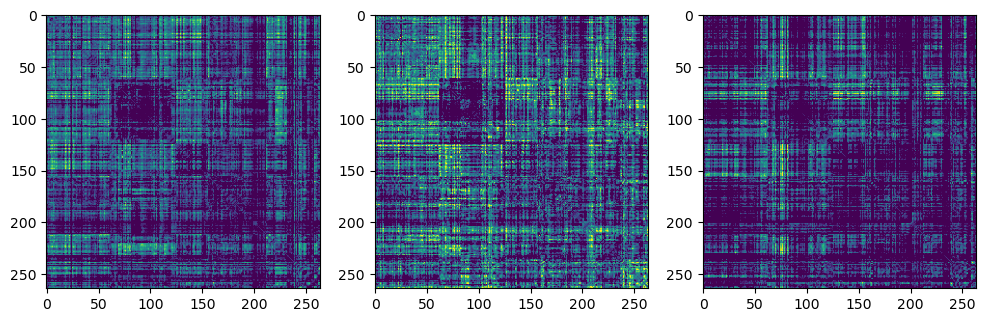

In [48]:
import matplotlib.pyplot as plt 

mu_u = np.mean(np.concatenate([ukbmale2, ukbfemale2], axis=0), axis=0)
mu_um2 = np.mean(ukbmale2, axis=0)
mu_uf2 = np.mean(ukbfemale2, axis=0)

mu_r = np.mean(np.concatenate([restmale2, restfemale2], axis=0), axis=0)
mu_rm2 = np.mean(restmale2, axis=0)
mu_rf2 = np.mean(restfemale2, axis=0)

mu_bm2 = np.mean(fcmale2, axis=0)
mu_bf2 = np.mean(fcfemale2, axis=0)

fig, ax = plt.subplots(1,3,figsize=(12,4))

ax[0].imshow(remap(vec2mat(mu_rm2-mu_rf2)), vmin=-0.02, vmax=0.1)
ax[1].imshow(remap(vec2mat(mu_bm2-mu_bf2)), vmin=-0.02, vmax=0.1)
ax[2].imshow(remap(vec2mat(mu_um2-mu_uf2)), vmin=-0.02, vmax=0.1)

fig.show()